<h1>Balbir Singh</h1>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras. \
                                datasets.mnist.load_data()
x_train = x_train.reshape(60000, 28*28).astype('float32')/255
x_test = x_test.reshape(10000, 28*28).astype('float32')/255

In [2]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Input

# Add layers
input_layer = Input((784,))
hidden_layer = Dense(64, activation = 'relu', name="hidden_layer")(input_layer)
output_layer = Dense(10, activation='softmax')(hidden_layer)
model = Model(input_layer, output_layer)

from sklearn.preprocessing import LabelBinarizer
le = LabelBinarizer()

y_train_onehot = le.fit_transform(y_train)
y_test_onehot = le.transform(y_test)

# compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

NO_EPOCHS = 10
history = model.fit(x_train, y_train,
                   batch_size=64,
                   epochs=NO_EPOCHS,
                   validation_split=0.2)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 41us/sample - loss: 0.3783 - acc: 0.8953 - val_loss: 0.2146 - val_acc: 0.9401
Epoch 2/10
48000/48000 [==============================] - 2s 34us/sample - loss: 0.1867 - acc: 0.9467 - val_loss: 0.1632 - val_acc: 0.9526
Epoch 3/10
48000/48000 [==============================] - 2s 35us/sample - loss: 0.1420 - acc: 0.9593 - val_loss: 0.1466 - val_acc: 0.9575
Epoch 4/10
48000/48000 [==============================] - 2s 35us/sample - loss: 0.1147 - acc: 0.9670 - val_loss: 0.1255 - val_acc: 0.9628
Epoch 5/10
48000/48000 [==============================] - 2s 35us/sample - loss: 0.0966 - acc: 0.9724 - val_loss: 0.1188 - val_acc: 0.9660
Epoch 6/10
48000/48000 [==============================] - 2s 35us/sample - loss: 0.0830 - acc: 0.9766 - val_loss: 0.1106 - val_acc: 0.9672
Epoch 7/10
48000/48000 [===========

In [ ]:
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

from sklearn.manifold import TSNE
tsne = TSNE()

In [ ]:
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

(<Figure size 576x576 with 1 Axes>,
 [Text(-42.185223, 1.6020542, '0'),
  Text(31.129166, -16.54057, '1'),
  Text(-18.861961, -12.897654, '2'),
  Text(2.3128712, -28.793032, '3'),
  Text(-1.369343, 29.037361, '4'),
  Text(4.7642994, -14.020173, '5'),
  Text(-26.097383, 13.795261, '6'),
  Text(20.489119, 13.2422905, '7'),
  Text(-3.799547, -1.8508127, '8'),
  Text(8.965199, 28.984016, '9')])

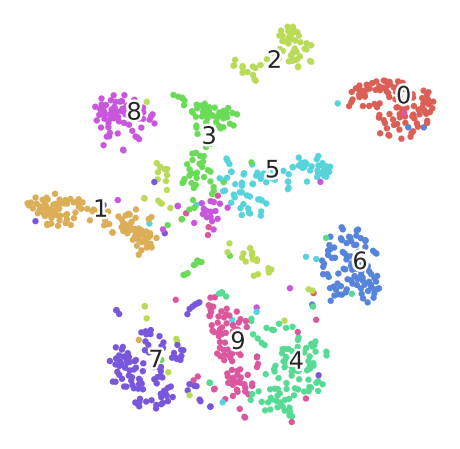

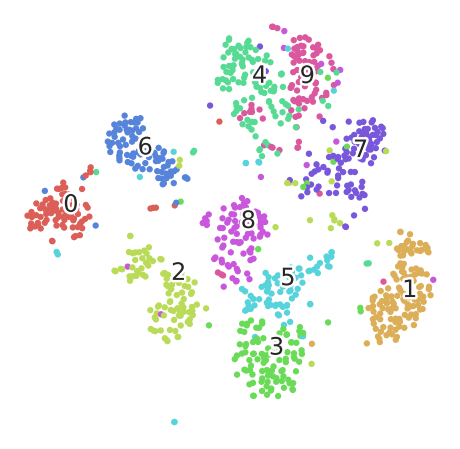

In [5]:
hidden_layer_output = model.get_layer('hidden_layer').output
embd_model = Model(input_layer, hidden_layer_output)

x_train_embd = embd_model.predict(x_train[:1000])
x_test_embd = embd_model.predict(x_test[:1000])

train_embeds = tsne.fit_transform(x_train_embd)
eval_embeds = tsne.fit_transform(x_test_embd)

fashion_scatter(train_embeds, y_train[:1000])
fashion_scatter(eval_embeds, y_test[:1000])

Comment: MLFFNN gives 96% accuracy. It is not able to do as good a job as random forrest or CNN with one layer.